In [140]:
import json
import ast
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [112]:
bins = 1000
lat_min, lat_max = 41.04961, 41.24961
lon_min, lon_max = -8.71099, -8.51099

In [113]:
def get_coordinates(from_file, to_file):
    df = pd.read_csv(from_file)
    data = np.array(df)
    heatmap_plot = []
    for i in data:
        for j in range(int(i[2])):
            heatmap_plot.append([i[1], i[0]])
    pd.DataFrame(heatmap_plot, columns=['lng', 'lat']).to_csv(to_file, index=False)

In [134]:
def plot_histogram(file, image_name):
    histogram2d_plot = pd.read_csv(file)
    x = histogram2d_plot.lat
    y = histogram2d_plot.lng
    plt.hist2d(y, x, bins=15, cmap=plt.cm.jet, range=np.array([(lat_min, lat_max), (lon_min, lon_max)]))
    plt.colorbar()
    plt.savefig(image_name, figsize=(8, 6), dpi=1000)

In [141]:
def plot_travel_map(dataset_file, image_name):
    data = pd.read_csv(dataset_file,
                       chunksize=1000,      
                       usecols=['POLYLINE'],
                       converters={'POLYLINE': lambda x: json.loads(x)})
    z = np.zeros((bins, bins))
    for chunk in data:
        latlon = np.array([(lat, lon) 
                            for path in chunk.POLYLINE
                            for lon, lat in path if len(path) > 0])
        z += np.histogram2d(*latlon.T, bins=bins, 
                            range=[[lat_min, lat_max],
                                    [lon_min, lon_max]])[0]
    log_density = np.log(20 + z)
    plt.imshow(log_density[::-1,:], # flip vertically
           extent=[lat_min, lat_max, lon_min, lon_max])
    plt.savefig(image_name, figsize=(8, 6), dpi=1000)

In [130]:
get_coordinates('./data/space_plotting.csv', './data/heatmap.csv')

In [131]:
get_coordinates('./data/space_plotting_synthetic_data.csv', './data/heatmap_synthetic_data.csv')

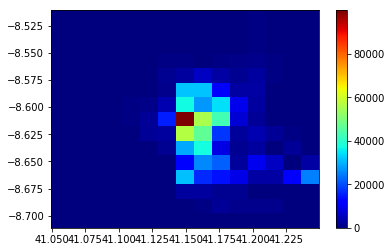

In [135]:
plot_histogram('./data/heatmap.csv', 'contact_tracing_heatmap.png')

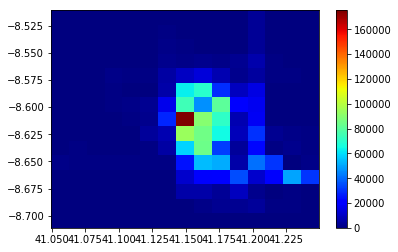

In [136]:
plot_histogram('./data/heatmap_synthetic_data.csv', 'contact_tracing_heatmap_synthetic_data.png')

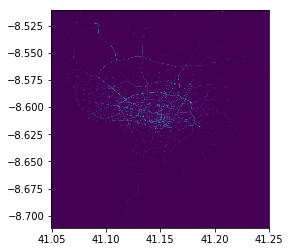

In [142]:
plot_travel_map('./data/test_synthetic_data.csv', 'heatmap_test_synthetic_data.png')

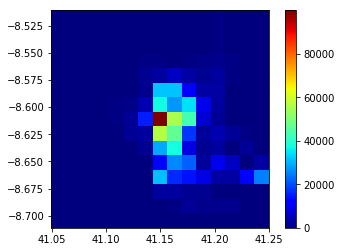

In [144]:
plot_travel_map('./data/test.csv', 'heatmap_test.png')
plot_histogram('./data/heatmap.csv', 'contact_tracing_heatmap.png')